In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [9]:
import imp
import numpy as np
from scipy import constants
from scipy.linalg import pinv2 as scipy_invert

import lsst.daf.persistence as daf_persistence
from lsst.sims.photUtils import Bandpass, PhotometricParameters
from lsst.utils import getPackageDir

In [10]:
def look(img, range=None, x_range=None, y_range=None):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    plt.figure(figsize=(16, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
#     img_use = np.clip(img, range[0], range[1])
    img_use = img.copy()
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
#     if preserve_scale:
#         img_use[0,0] = range[0]
#         img_use[-1,-1] = range[1]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow, clim=range)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [11]:
repository = "./test_data/"
obsid_range = np.arange(100, 124, 3)
band_name = "g"

In [12]:
# imp.load_source('dcr_template', './python/dcr_template.py')
from python.dcr_template import DcrCorrection
from python.dcr_template import DcrModel

In [13]:
self = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name)

In [14]:
self.calc_psf_model()
# look(self.psf_avg)

In [15]:
x0 = 150
dx = 65
y0 = 480
dy = 70

In [16]:
x0 = 300
dx = 200
y0 = 500
dy = 200

In [17]:
x0 = 840
dx = 50
y0 = 628
dy = 80

In [18]:
x0=400
dx=50
y0=500
dy=80

In [19]:
self.build_model(max_iter=10, clamp=3., test_convergence=True)

Calculating initial solution... Done!
Fractional change per iteration:
Full initial convergence metric:  [ 2.92882683  2.87691492  2.83154225  2.84796199  2.863602    2.88579619
  2.89804923  2.90903554]
Iteration 0: delta=0.075606
Stddev(last_solution): 289.098535, mean(abs(last_solution)): 11.813488
Stddev(new_solution): 306.267155, mean(abs(new_solution)): 11.852902
Full convergence metric: [ 2.87136286  2.81779502  2.63979222  2.62802302  2.53851634  2.54805854
  2.48749348  2.4922902 ]
Convergence metric: 2.627916
Iteration 1: delta=0.029972
Stddev(last_solution): 306.267155, mean(abs(last_solution)): 11.852902
Stddev(new_solution): 310.210134, mean(abs(new_solution)): 11.890243
Full convergence metric: [ 2.77124726  2.73337878  2.57067214  2.56042875  2.51402266  2.51432608
  2.48653145  2.47987671]
Convergence metric: 2.578810
Iteration 2: delta=0.019536
Stddev(last_solution): 310.210134, mean(abs(last_solution)): 11.890243
Stddev(new_solution): 311.543944, mean(abs(new_solution

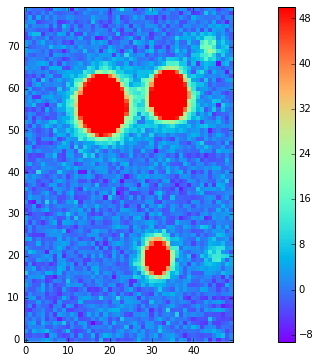

('max: ', 1893.8088, 'sum: ', 91015.25)
Matched-scale SUM


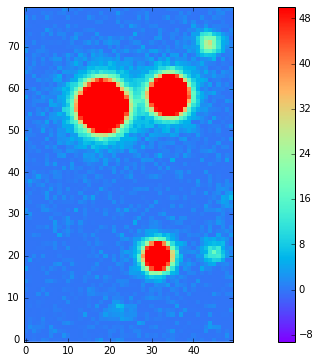

('max: ', 2751.1620836556294, 'sum: ', 91878.821862322147)


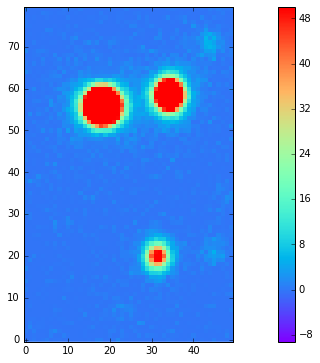

('max: ', 972.93967247146134, 'sum: ', 31247.180016907489)


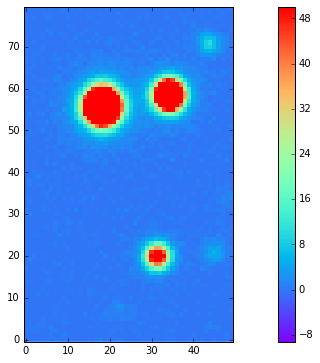

('max: ', 914.2885545917452, 'sum: ', 30595.483549749832)


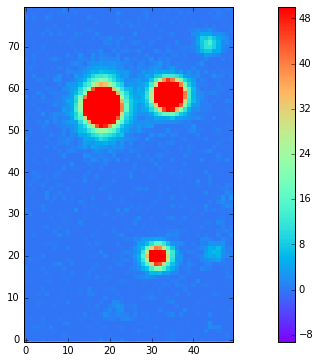

('max: ', 863.93385659242313, 'sum: ', 30036.158295664831)
SUM


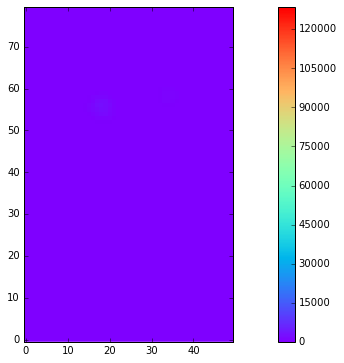

('max: ', 2751.1620836556294, 'sum: ', 91878.821862322147)
DIFF last - first


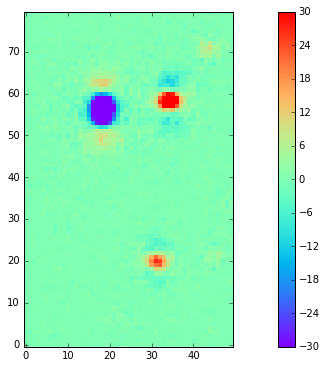

DIFF second - first


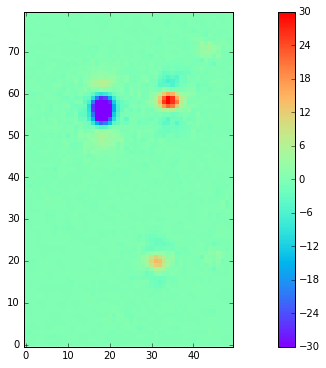

DIFF last - second to last


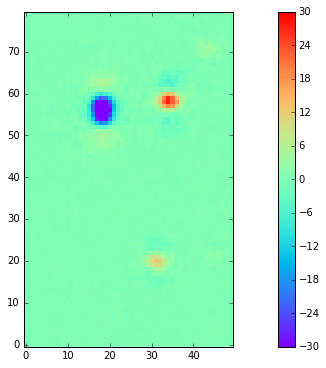

In [13]:
slice_inds = np.s_[y0: y0 + dy, x0: x0 + dx]
ref_im = self.exposures[0].getMaskedImage().getImage().getArray()[slice_inds]
min_use = np.min([np.min(ref_im),50.])
look(ref_im, range=[min_use,50])
print("max: ", np.max(ref_im), "sum: ", np.sum(ref_im))
rescale = 1.
sum_im = np.sum([self.model[_i]*rescale for _i in range(self.n_step)],axis=0)
print("Matched-scale SUM")
look(sum_im,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=[min_use,50])
print("max: ", np.max(sum_im[slice_inds]), "sum: ", np.sum(sum_im[slice_inds]))
for _i in range(self.n_step):
    look(self.model[_i]*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=[min_use,50])
    print("max: ", np.max(self.model[_i][slice_inds]*rescale),
          "sum: ", np.sum(self.model[_i][slice_inds]*rescale))
print("SUM")
look(sum_im,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy])
print("max: ", np.max(sum_im[slice_inds]), "sum: ", np.sum(sum_im[slice_inds]))

diff_range = [-30, 30]
print("DIFF last - first")
look((self.model[-1] - self.model[0])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)
print("DIFF second - first")
look((self.model[1] - self.model[0])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)
print("DIFF last - second to last")
look((self.model[-1] - self.model[-2])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)


In [14]:
slice_inds = np.s_[y0: y0 + dy, x0: x0 + dx]
look(np.sum(self.model_variance, axis=0)[slice_inds]*np.sqrt(self.n_images))

AttributeError: DcrCorrection instance has no attribute 'model_variance'

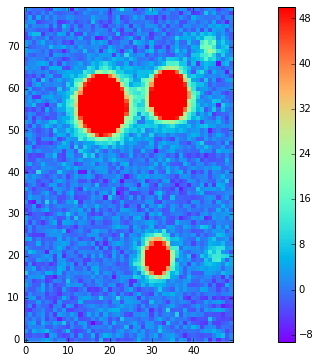

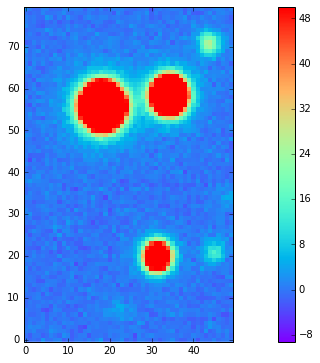

In [15]:
slice_inds = np.s_[y0: y0 + dy, x0: x0 + dx]
ref_im = self.exposures[0].getMaskedImage().getImage().getArray()[slice_inds]
min_use = np.min([np.min(ref_im),50.])
look(ref_im, range=[min_use,50])
look(self.model_base[0][slice_inds], range=[min_use,50])

In [14]:
calexp_108 = self.butler.get("calexp", dataId={'visit': 108, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_109 = self.butler.get("calexp", dataId={'visit': 109, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_110 = self.butler.get("calexp", dataId={'visit': 110, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_120 = self.butler.get("calexp", dataId={'visit': 120, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_121 = self.butler.get("calexp", dataId={'visit': 121, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})

In [15]:
output_directory='/Users/sullivan/LSST/simulations/test5/output_data/'
template_exposure_gen = self.generate_templates_from_model(obsid_range=[108, 109, 110],output_repository=None,
                                                           output_obsid_offset=600)
im_arr = []
for exp in template_exposure_gen:
    im_arr.append(exp.getMaskedImage().getImage().getArray())

Working on observation 108 ... Done!
Working on observation 109 ... Done!
Working on observation 110 ... Done!


In [17]:
# self.export_model(model_repository="/Users/sullivan/LSST/simulations/test5/output_data")

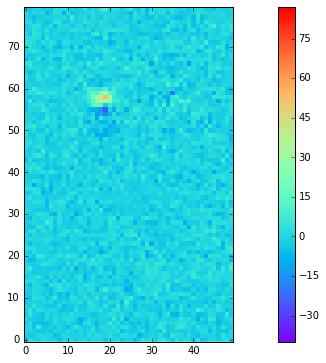

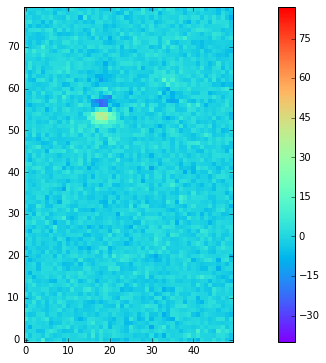

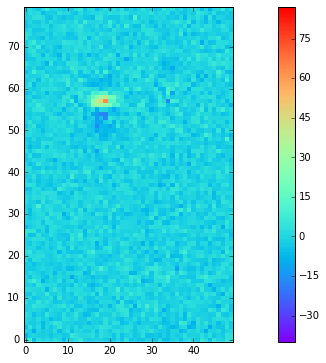

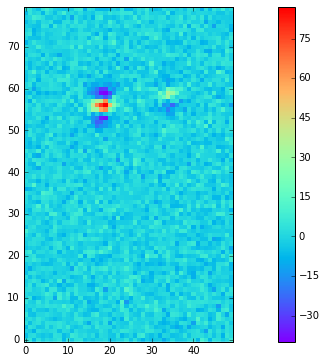

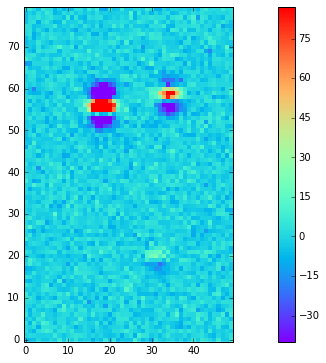

In [16]:
ref_diff = calexp_110.getMaskedImage().getImage().getArray() - calexp_108.getMaskedImage().getImage().getArray()
zen_diff = calexp_120.getMaskedImage().getImage().getArray() - calexp_108.getMaskedImage().getImage().getArray()
range_use = [np.min(ref_diff[y0: y0 + dy, x0: x0 + dx]), np.max(ref_diff[y0: y0 + dy, x0: x0 + dx])]
scale = 1.
look(calexp_108.getMaskedImage().getImage().getArray() - im_arr[0]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_use)
look(calexp_109.getMaskedImage().getImage().getArray() - im_arr[1]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_use)
look(calexp_110.getMaskedImage().getImage().getArray() - im_arr[2]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_use)
look(ref_diff, x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=range_use)
look(zen_diff, x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=range_use)

The code and images below are preserved for comparison to future runs.

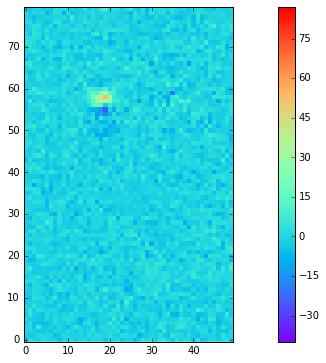

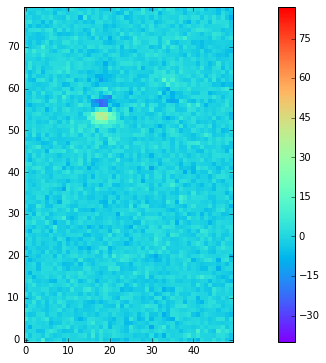

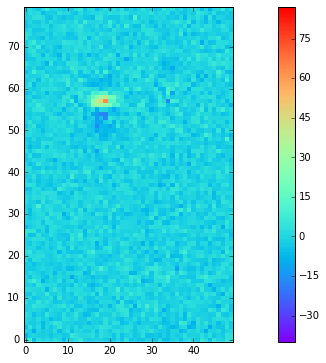

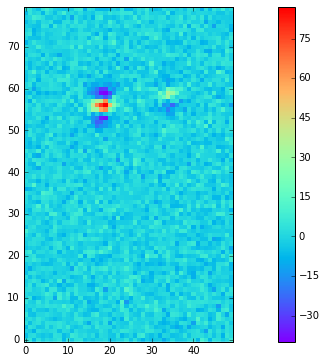

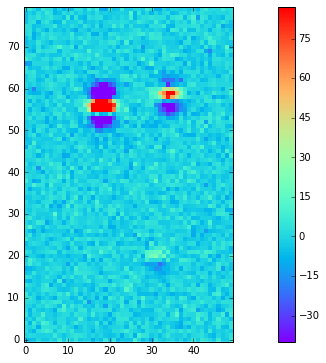

In [18]:
ref_diff = calexp_110.getMaskedImage().getImage().getArray() - calexp_108.getMaskedImage().getImage().getArray()
zen_diff = calexp_120.getMaskedImage().getImage().getArray() - calexp_108.getMaskedImage().getImage().getArray()
range_use = [np.min(ref_diff[y0: y0 + dy, x0: x0 + dx]), np.max(ref_diff[y0: y0 + dy, x0: x0 + dx])]
scale = 1.
look(calexp_108.getMaskedImage().getImage().getArray() - im_arr[0]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_use)
look(calexp_109.getMaskedImage().getImage().getArray() - im_arr[1]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_use)
look(calexp_110.getMaskedImage().getImage().getArray() - im_arr[2]*scale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],
     range=range_use)
look(ref_diff, x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=range_use)
look(zen_diff, x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=range_use)